# Лекция 1

## Perceptron

Перцептрон (perceptron) - простой алгоритм, который по заданному вектору $x = (x_1, x_2, \ldots, x_n)$, называемому входными атрибутами, дает либо 1 (да), либо 0.
Математически, это выражается функцией:


$$f(x) = \begin{cases} 1, & wx + b > 0 \\ 0, & \mbox{otherwise }\end{cases}$$

где $w$ - вектор весовых коэффициентов, а $wx$ - скалярное произведение: $\sum_{j=1}^{m}w_jx_j$, и $b$ - смещение (bias).

Если вспоминать геометрию, то $wx+b$ определяет границы гиперплоскости.

Если $x$ лежит над гиперплоскостью, то решение уравнения $wx+b>0$, а если под  гиперплоскостью, то $wx+b<0$.
**Перцептрон не может отвечать на вопрос "может быть"** Он может ответить на простой вопрос **да (1)** или **нет (0)**, если у нас есть понимание как именно определить $w$ и $b$ (которые определяются в ходе процесса обучения).

## Первый пример использования Keras

Первичный базовый блок Keras - это **модель**, и простейшая модель называется **последовательной (sequential)**. Последовательная модель Keras - просто линейный конвейер (стек) слоев нейронной сети.

Фрагмент кода ниже определяет один слой с 12 нейронами, и он ожидает 8 входных переменных (атрибутов):

In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer = 'random_uniform'))

Каждый нейрон инициализируется конкретными весами. Keras предоставляет несколько возможнестей для начальной инициализации:
* __random_uniform__: Веса инициализируются равномерно случайными значениями в интервале $(-0.05; 0.05)$.
Другими словами, каждое значение в заданном интервале равновероятно.

* __random_normal__: Веса инициализируются в соответствии с Гауссовским распределением с нулевым матожиданием и малым стандартным отклонением $\sigma = 0.05$.

* __zero__ : Веса инициализируются нулевыми значениями;


Полный список: https://keras.io/initializers/

###### Многослойный перцептрон

Рассмотрим пример нейронной сети с несколькими линейными слоями. Исторически, перцептрон было именем данным модели с одним линейным слоем.
Как следствие, если он имеет несколько слоев, то он будет называться **многослойным перцептроном (multilayer perceptron, MLP)**.

На рис. изображена общая нейронная сеть с одним входным слоем (input layer), одним промежуточным слоем (intermediate layer) и одним выходным слоем (output layer).

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_02.png)

В представлененой диаграмме, каждый узел первого слоя получает на вход данные, и реагирует в соответствии с предопределенными локальными решающими границами.
Выход первого слоя передается на второй слой, результаты которого передаются на последний выходной уровень, содержащий всего один нейрон.

Приведенная архитектура является примером плотной сети (dense network).
**Сеть плотная (dense), что означает что каждый нейрон в слое соединен со всеми нейронами предыдущего слоя и всеми нейронами последующего слоя.**

## Проблемы при обучении перцептрона

Рассмотрим единичный нейрон, как наилучшим образом выбрать вес $w$ и смещение (bies) $b$. В идеале, мы бы хотели предоставить множество обучающих примеров и дать компьютеру возможность настроить веса и смещение так, чтобы минимизировать число возникающих ошибок.

Для того, чтобы быть более конкретными, предположим, что у нас есть множество картинок кошек и другое множество картинок, на которых нет кошек. 

Для простоты, предположим что каждый нейрон анализирует один пиксель исходной картинки. Мы хотели бы, чтобы в процессе обработки изображений нейрон изменял свой вес и смещение так, чтобы число изображений, распознанных как не кошки со временем уменьшалось. Этот подход интуитивно очевиден, но для него требуется, чтобы малое изменение веса (и\или смещения) приводило к малому изменению результата.

Если имеется большой скачок га выходе, то прогрессивное обучение невозможно (разве что пробовать всевозможные направления). В конце концов, дети учаться постепено. Для перцептрона же такое "постепенное" поведение нехарактерно. Перцептрон выдает значение 0, или 1 - дискретное значение.

Вместо этого необходима гладкая - непрерывная дифференцируемая функция, монотонно возрастающая на отрезке $[0;1]$.

## Сигмоида

Сигмоидальная функция определяется сл. образом: $$\sigma(x) = \frac{1}{1+e^{-x}}$$.

Сигмоидальная функция непрерывна и изменяется от 0 до 1, когда аргумент пробегает область определения $(-\inf; \inf)$.

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_05.png)

Нейрон может воспользоваться сигмоидальной функцией для вычисления нелинейной функции $\sigma(z = wx+b)$. Отметим, что когда величина $z=wx+b$ очень велика и положительна, $e^{-z} \to 0$, так что $\sigma(z)\to 1$, а когда эта величина велика по модулю и отрицательна, то $e^{-z} \to \inf$, так что $\sigma(z)\to 0$.
Иными словами, нейрон с сигмоидной функцией активации ведет себя подобно перцептрону, но изменяется плавно и может порождать такие значения, как 0.5539 или 0.123191. В некотором смысле, нейрон с сигмоидной функцией активации умеет давать ответ *может быть*

## Блок линейной ректификации (ReLU)

В последнее время стала популярна совсем простая функция активации, называемая **блоком линейной ректификации (rectified linear unit ReLU)**, поскольку в экспериментах она дает замечательные результаты.
Определяется ReLU формулой:
$$ f(x) = \max(0, x)$$
График функции ReLU показан на рисунке:

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_06.png)

## Функции активации

Сигмоида и ReLU называются функциями активации. Непрерывное изменение, характерное для этих функций крайне важно для разработки алгоритмов обучения, которые адаптируются постепенно, стремясь уменьшить ошибку сети. 

На рисунке ниже проиллюстрирована схема применения функции активации $\sigma$ к входному вектору $(x_1, x_2, \ldots, x_m)$ вектору весов $(w_1, w_2, \ldots, w_m)$, смещению $b$ и сумматору $\Sigma$:

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_07.png)

Keras подерживает несколько функций активации, полный перечень приведен в документации: https://keras.io/activations/

# Реальный пример - распознавание рукописных цифр

Построим сеть, умеющую распознавать рукописные цифры.

* Набор данных MNIST: 60 000 обучающих и 10 000 тестовых примеров;
* Все изображения полутоновые, размера 28x28 пикселей.

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_08.png)

## Унитарное (one hot) кодирование

Во многих приложениях удобно преобразовывать категориальные признаки в числовые. апример категориальный признак - цифру, принимающую значение $d$ от 0 до 9, - можно представить бинарным вектором длины 10, в котором $d$-й элемент равен 1, а остальные 0.

Такое представление называется **унитарным кодированием (one-hot encoding)** и часто применяется в анализе данных.

## Определение простой нейронной сети в Keras

Итак, будем использовать библиотеку Keras для определения нейронной сети, распознающей рукописные цифры из набора MNIST.

Keras предоставляет средства для закрузки набора данных и разбиения его на обучающую и тестовые выборки. Для поддержки вычислений на GPU данные преобразуются к типу float32 и нормируются на интервал [0;1].
Также проводится унитарное кодирование.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671) # for reproducibility

Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [3]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

11419648/11490434 [============================>.] - ETA: 0s60000 train samples
10000 test samples


Во входном слое с каждым пикселем изображения будет ассоциирован один нейрон, т.е. всего получается 28x28 = 784 нейрона.

Обычно значения ассоциированные с пикселями нормируются для приведения к диапазону [0;1]. На выходе получается 10 классов, по одному для каждой цифры.

Последний слой состоит из единственного нейрона с функцией активации **softmax**, являющейся обобщением сигмоидальной функции. Softmax "сплющивает" k-мерный вектор, содржащий произвольные вещественные числа в $k$-мерный вектор вещественных чисел из интервала (0;1). 
В нашем случае, она агрегирует 10 ответов, выданных предыдущем слоем из 10 нейронов.


In [4]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Определенную таким образом модель необходимо откомпилировать, т.е. привести к виду, допускабщему использование бащовой библиотекой (Theano\TensorFlow). Перед компиляцией необходимо определить с выбором:
* оптимизатора, т.е. выбрать конкретный алгоритм, который будет обновлять веса в процессе обучения модели;
* целевой функции (функции потерь), которую оптимизатор использует для навигации по пространству весов;
* оценки качества обученной модели.

Несколько широко распространенных целевых функций (функций потерь).
Полный список приведен: https://keras.io/losses/

* Среднеквадратичная ошибка (MSE)
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{Y} - Y)^2$$
где $\hat{Y}$ - вектор $n$ предсказаний, а $Y$ - вектор $n$ наблюдаемых значений.
*Если предсказание сильно отличается от истинного значения, то возвдение квадрат делает отличие еще более выраженным*


* Бинарная перекрестная энтропия (binary cross-entropy\)
Если модель предсказывает значение $p$, тогда как истинное значение равно $t$, то бинарная перекрестная энтропия равна:
$$ -t\log(p) - (1-t)\log(1-p)$$
*Эта целевая функция подходит для предсказания бинарных меток*


* Категориальная перекрестная энтропия
Представляет собой логарифмическую потерю в случае нескольких классов. Если модель предсказывает значения $p_{i,j}$, тогда как истинные значения равны $t_{i,j}$, то категориальная перекрестная энтропия равна:
$$L_{i} = -\sum_{j}t_{i,j}\log(p_{i,j})$$
*Эта целевая функция подходит для многоклассовой классификации. По умолчанию она использщуется совместно с функцией активации softmax*




Наиболее популярные показатели качества:
* Верность (accuracy) - отношение числа правильных предсказаний к общему числу меток;
* Точность (precision) - доля правильных ответов модели;
* Полнота (recall) - доля обнаруженных истинных событий.

Полный список: https://keras.io/metrics/

Показатели качества напоминают целевые функции. Различаются же они тем, что показатели используются не для обучения модели, а для оценки её качества. Компиляция модели в Keras производится сл. образом:


In [5]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])


Для обучения откомпилированной модели служит функция *fit()*, принимающая следующие параметры:
* **epochs**: число периодов (эпох) - сколько раз обучающий набор "предъявляется" модели. На каждой итерации оптимизатор пытается подкорректировать веса, стремясь минимизировать целевую функцию;
* **batch_size** : сколько обучающих примеров должен увидеть оптимизатор прежде чем он обновит веса.

В Keras обучение модели достаточно простое. Аналогично обучению во фреймворке scikit-learn.


In [7]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=10,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.3367 - acc: 0.9065 - val_loss: 0.3198 - val_acc: 0.9112
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.3353 - acc: 0.9071 - val_loss: 0.3187 - val_acc: 0.9120
Epoch 3/10
48000/48000 [==============================] - ETA: 0s - loss: 0.3341 - acc: 0.906 - 1s - loss: 0.3340 - acc: 0.9070 - val_loss: 0.3176 - val_acc: 0.9119
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.3327 - acc: 0.9079 - val_loss: 0.3167 - val_acc: 0.9116
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.3315 - acc: 0.9081 - val_loss: 0.3157 - val_acc: 0.9119
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.3303 - acc: 0.9083 - val_loss: 0.3147 - val_acc: 0.9128
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.3291 - acc: 0.9085 - val_loss: 0.3138 - val_acc: 0.9126
Epoch 8/10
48000/48000 

*В этом примере часть обучающего набора зарезервирована для контроля.*


После обучения модели, проверку следует проводить на тестовом наборе. Таким образом, мы сможем получить минимальное значение, достигаемое целевой функцией, и наилучшее значение показателя качества.


**Тренировочная и тестовая выборка не должны пересекаться**.
(Вспоминаем в чем смысл обучения?)

In [9]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print()
print("Test score:", score[0])
print('Test accuracy:', score[1])

 9088/10000 [==========================>...] - ETA:  - ETA: 0s
Test score: 0.310620229274
Test accuracy: 0.9144


Итак, проверка модели:
* тренировочная выборка: 0.9091
* контрольная: 0.9133
* тестовая выборка: 0.9144

## Улучшение нейронной сети посредством добавления скрытых слоев

Первым улучшением предложенной нейронной сети будет включение в сеть дополнительных слоёв. После входного слова поместим первый плотный слой с **N_HIDDEN** нейронами и функцией активации ReLU. Этот слой называется скрытым, потому что он напрямую не соединен ни с входом ни с выходом. После первого скрытого слоя добавим еще один, также содержащий **N_HIDDEN** нейронов, а уже за ним будет выходной слов с 10 нейронами.


In [15]:
# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [16]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [17]:
#convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score: {}\nTest accuracy: {}".format(score[0], score[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Trai

Добавив два скрытых слоя, мы достигли верности:
* на обучающем наборе: 0.9256
* на контрольном наборе: 0.9284
* на тестовом наборе: 0.9299

** Задание: как изменится точность если вместо двух скрытых слоев добавить один? **

** Задание: как изменится точность, если добавить больше двух скрытых слоёв?**


## Дальнейшее улучшение простой сети Keras: прореживание (Dropout)

Применим еще одно достаточно простое улучшение. Добавим т.н. **прореживание** - с вероятностью *dropout* будем случайным образом отбрасывать некоторые значения, распространяющиеся внутри сети, состоящей из плотных скрытых лоев. Это хорошо известная форма регуляризации. 

Как ни странно, отбрасывание некоторых значений приводит к улучшению качества.


In [20]:
from keras.layers import Dropout
# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score: {}\nTest accuracy: {}".format(score[0], score[1]))


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1

Как повела себя нейронная сеть в результате добавления прореживания? Выполнив те же 10 итераций, что и раньше получим сл. изменения верности:
* на обучающем наборе: 0.9256 => **0.8823**
* на контрольном наборе: 0.9284 => **0.9262**
* на тестовом наборе: 0.9299 => **0.9258**

Что-то как то ни о чем!

**Следует заметить, что верность на обучающем наборе должна быть выше, чем на тестовом, в противном случае мы прервали обучение слишком рано.**

Увеличим число периодов до 30!

In [24]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=200,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score: {}\nTest accuracy: {}".format(score[0], score[1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 4s - loss: 0.2003 - acc: 0.9414 - val_loss: 0.1377 - val_acc: 0.9597
Epoch 2/200
48000/48000 [==============================] - 3s - loss: 0.1965 - acc: 0.9424 - val_loss: 0.1360 - val_acc: 0.9605
Epoch 3/200
48000/48000 [==============================] - 3s - loss: 0.1935 - acc: 0.9431 - val_loss: 0.1344 - val_acc: 0.9612
Epoch 4/200
48000/48000 [==============================] - 3s - loss: 0.1904 - acc: 0.9442 - val_loss: 0.1335 - val_acc: 0.9617
Epoch 5/200
48000/48000 [==============================] - 4s - loss: 0.1894 - acc: 0.9438 - val_loss: 0.1321 - val_acc: 0.9616
Epoch 6/200
48000/48000 [==============================] - 3s - loss: 0.1858 - acc: 0.9455 - val_loss: 0.1311 - val_acc: 0.9615
Epoch 7/200
48000/48000 [==============================] - 3s - loss: 0.1848 - acc: 0.9451 - val_loss: 0.1299 - val_acc: 0.9614
Epoch 8/200
48000/48000 [=============================

48000/48000 [==============================] - 3s - loss: 0.0842 - acc: 0.9742 - val_loss: 0.0838 - val_acc: 0.9761
Epoch 128/200
48000/48000 [==============================] - 3s - loss: 0.0830 - acc: 0.9744 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 129/200
48000/48000 [==============================] - 3s - loss: 0.0825 - acc: 0.9737 - val_loss: 0.0822 - val_acc: 0.9763
Epoch 130/200
48000/48000 [==============================] - 3s - loss: 0.0818 - acc: 0.9741 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 131/200
48000/48000 [==============================] - 3s - loss: 0.0795 - acc: 0.9756 - val_loss: 0.0827 - val_acc: 0.9763
Epoch 132/200
48000/48000 [==============================] - 3s - loss: 0.0817 - acc: 0.9754 - val_loss: 0.0827 - val_acc: 0.9756
Epoch 133/200
48000/48000 [==============================] - 4s - loss: 0.0818 - acc: 0.9750 - val_loss: 0.0819 - val_acc: 0.9759
Epoch 134/200
48000/48000 [==============================] - 4s - loss: 0.0815 - acc: 0.9750 - val_loss:

Интересно понаблюдать за тем, как возрастает верность на обучающем и тестовом наборе при увеличении числа периодов. На графике ниже, эти две кривые сходятся, когда число периодов примерно равно N, поэтому последующее обучение **ничего не даст**.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


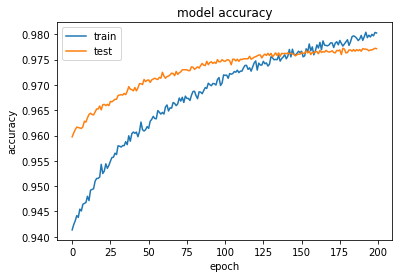

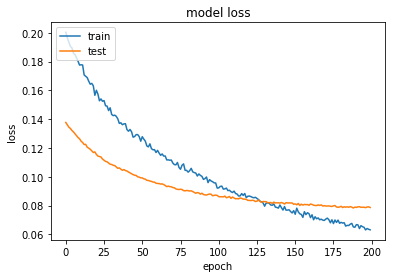

In [25]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Замечено, что сети со случайным прореживанием внутренних слоев часто лучше обобщаются на новые примеры из тестового набора. 

Интуитивно это можно объяснить тем, что каждый нейрон становится "умнее", потому что знает, что нельзя полагаться на соседей В процессе тестирования прореживание не производится, то есть используются все тщательно настроенные нейроны.
В общем случае, рекомендуется проверять, как будет работать сеть, если применена та или иная форма прореживания.



## Тестирование различных оптимизаторов в Keras

Теперь попытаемся интуитивно понять процесс обучения сети. Один из самых популярных методов обучения является **метод градиентного спуска (gradient descent).** 
Представим себе функцию стоимости $C(w)$ от одной переменной $w$ с графиком сл. вида:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_18.png)

Простая аналогия для понимания градиентного спуска: альпинист, спускающийся с горы в долину. Гора представлена функцией $C$, а долина - минимальным значением $C_{min}$ Альпинист находится в начальной точки $w_0$ и передвигается небольшими шагами.

На каждом шаге $r$ градиент дает направление максимального роста. Математически, это направление определяется частной производной $\frac{\partial c}{\partial w}$ в точке $w_r$, в которой альпинист оказался на шаге $r$. Поэтому, двигаясь в противоположном направлении $-\frac{\partial c}{\partial w}$, альпинист будет направляться в сторону долины. На каждом шаге альпиист может учитывать длину своей ноги пред следующим шагом. В терминологии GD это называется скоростью обучения $\alpha \geq 0$. Если она слишком мала, альпинист будет двигаться медленно, а если слишком велика, есть шанс проскочить мимо долины.

Сигмоида - гладкая функция и вычислить её производную не должно составить проблем.

Функция ReLU не дифференцируема в точке 0. Однако, можно доопределить ее производную в этой точке, выбрав в качестве значения 0 или 1. Тогда производной блока линейной ректификации $y=max(0,x)$ будет такая *кусочно-постоянная функция*:
$$\frac{\partial y}{\partial x} = \begin{cases} 0, & x \leq 0  \\ 1, & x > 0 \end{cases}$$

Зная производную, можно оптимизировать сеть методом градиентного спуска. Keras для вычислений использует базовую библиотеку (TensorFlow или Theano), так что нам не нужно думать о реализации.

Нейронная сеть представляет собой композицию нескольких функций с тысячами (а иногда и миллионами) параметров. Каждый слой вычисляет функцию, ошибку которой необходимо минимизировать, чтобы улучшить верность на этапе обучения.


В Keras реализован быстрый вариант градиентного спуска - **стозастический градиентный спуск (SGD)** и два более продвинутых метода оптимизхации: **RMSProp** и **Adam**. В обоих методах участвует понятие импульса к ускорению, используемого в GD. В результате достигается более быстрая сходимость, но ценой увеличения объёма вычислений.

Полный список оптимизаторов в Keras: https://keras.io/optimizers/

По умолчанию выбирается метод SGD. Чтобы выбрать другой метод оптимизации надо поменять пару строк:

In [26]:
from keras.optimizers import RMSprop, Adam


In [27]:
OPTIMIZER = RMSprop()

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=200,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score: {}\nTest accuracy: {}".format(score[0], score[1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 4s - loss: 0.0955 - acc: 0.9695 - val_loss: 0.0877 - val_acc: 0.9756
Epoch 2/200
48000/48000 [==============================] - 4s - loss: 0.0914 - acc: 0.9716 - val_loss: 0.0868 - val_acc: 0.9772
Epoch 3/200
48000/48000 [==============================] - 3s - loss: 0.0878 - acc: 0.9717 - val_loss: 0.0896 - val_acc: 0.9752
Epoch 4/200
48000/48000 [==============================] - 4s - loss: 0.0835 - acc: 0.9734 - val_loss: 0.0895 - val_acc: 0.9770
Epoch 5/200
48000/48000 [==============================] - 3s - loss: 0.0813 - acc: 0.9749 - val_loss: 0.0940 - val_acc: 0.9763
Epoch 6/200
48000/48000 [==============================] - 3s - loss: 0.0778 - acc: 0.9756 - val_loss: 0.0890 - val_acc: 0.9788
Epoch 7/200
48000/48000 [==============================] - 4s - loss: 0.0779 - acc: 0.9767 - val_loss: 0.0904 - val_acc: 0.9780
Epoch 8/200
48000/48000 [=============================

48000/48000 [==============================] - 3s - loss: 0.0512 - acc: 0.9891 - val_loss: 0.1583 - val_acc: 0.9798
Epoch 128/200
48000/48000 [==============================] - 4s - loss: 0.0537 - acc: 0.9888 - val_loss: 0.1621 - val_acc: 0.9789
Epoch 129/200
48000/48000 [==============================] - 4s - loss: 0.0523 - acc: 0.9886 - val_loss: 0.1637 - val_acc: 0.9790
Epoch 130/200
48000/48000 [==============================] - 3s - loss: 0.0581 - acc: 0.9883 - val_loss: 0.1687 - val_acc: 0.9785
Epoch 131/200
48000/48000 [==============================] - 3s - loss: 0.0476 - acc: 0.9898 - val_loss: 0.1736 - val_acc: 0.9784
Epoch 132/200
48000/48000 [==============================] - 3s - loss: 0.0495 - acc: 0.9890 - val_loss: 0.1651 - val_acc: 0.9790
Epoch 133/200
48000/48000 [==============================] - 4s - loss: 0.0509 - acc: 0.9890 - val_loss: 0.1675 - val_acc: 0.9785
Epoch 134/200
48000/48000 [==============================] - 3s - loss: 0.0509 - acc: 0.9892 - val_loss:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


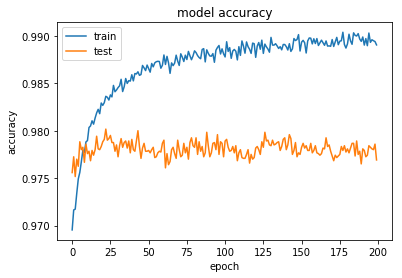

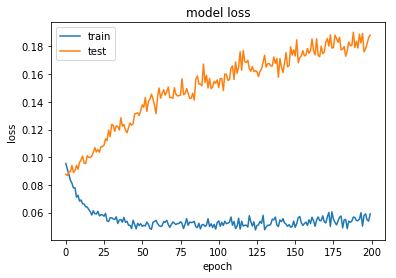

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RMSProp быстрее SGD, поэтому чтобы достичь верности:
* на тренировочной выборке
* на контрольной выборке
* на тестовой выборке

Понадобилось всего 10 итераций. Выше приведен график изменения верности и потери при росте числа периодов.

Теперь попробуем еще один оптимизатор: Adam.




In [ ]:
OPTIMIZER = RMSprop()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=200,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score: {}\nTest accuracy: {}".format(score[0], score[1]))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Мы последовательно улучшаем модель, но с каждым разом прирост дается всё труднее. Сейчас оптимизация производится с прореживанием 30%.

Можно рассмотреть верность на тестовых данных для других значений прореживания, когда в качестве оптимизатора используется Adam:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_24.png)

## Увеличение числа периодов (эпох)

Попробуем увеличить число периодов обучения с 20 до 200. Время вычислений увеличится в 10 раз, но никакого выигрыша мы не получим. 

Эксперимент оказался неудачным. **Увеличение времни обучения далеко не всегда приводит к улучшению. Успех обучения обусловлен скорее применением удачных методов, а не временем, потраченным на расчеты.**

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_25.png)

## Увеличение скорости обучения оптимизатора

Можно также попробовать изменить скорость обучения оптимизатора. На сл. графике видно, что оптимальное значение близко к 0.001, а это как раз и есть значение задаваемое по умолчанию.

Т.е. Adam работает не требуя никакой дополнительной настройки.

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_26.png)

## Увеличение числа нейронов в скрытых слоях

Еще одна возможность - изменение числа нейронов во внутренних скрытых слоях. На сл. графике показаны результаты, получаемые при увеличении числа нейронов, т.е. **сложности модели**.
Время вычислений быстро растет, поскольку приходится отимизировать все больше параметров. Но достигаемый выигрыш становится все меньше и меньше.

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_27.png)

На сл. графике изображено изменние времени одной итерации при росте числа скрытых нейронов.
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_28.png)

Изменение верности при росте числа нейронов:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_29.png)

## Увеличение размера пакета (batch)

Алгоритм градиентного спуска пытается минимизировать функцию стоимости одновременно на всех примерах обучающей выборки и для всех представленных в ней признаков. Алгоритм SGD обходится дешевле, поскольку в нем рассматривается тоько BATCH_SIZE примеров.

Ниже приведен график поведения модели в зависимости от этого параметра. Как видим, оптимальная верность достигается, когда BATCH_SIZE = 128:

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_30.png)


## Подведение итогов экспериментов по распознаванию рукописных цифр

Успешные эксперименты:
* Добавление скрытых слоёв сети;
* Прореживание (30%)
* Оптимизатор: RMSProp
* Оптимизатор: Adam

Неуспешные эксперименты:
* Рост числа внутренних нейронов влечет за собой рост модели и рост объема вычислений, но дает едва осязаемый выигрыш.
* То же самое относится и к увеличению числа периодов обучения.

## Применение регуляризации для предотвращения переобучения

Интуитивно представляется, что хорошая модель машинного обучения должна давать минимальную ошибку на обучающих данных. Математически это равносильно минимизации построенной моделью функции потерь на обучающих данных и выражается формулой:
$$ \min loss(Training data | Model) $$

Однако, этого может оказаться недостаточно. Модель может стать избыточно сложной (**почему?**).

1) Для выполнения сложно модели нужно много времени
2) Сложная модель может показывать великолепное качество на обучающих данных просто потому что она запомнила все присуствующие в них связи, но гораздо худше ена контролььных - поскольку модель не обобщается на новые данные, а только запоминает данные.
Таким образом, обобщение свелось к запоминанию

На графике изображена типичная функция потерь, убывающая как на обучабем, так и контрольном наборею однако, в какой-то момент потеря на контрольных данных начинает расти из-за переобучения.

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_31.png)

Эвристическое правило: если в процессе обучения мы наблюдаем возрастание потери на контролтьном наборе после первоначального убывания, значит модель слшком сложна и близком подогнана к обучающим данным.
Это называется **переобучение**.

Для решения проблемы переобучения нужно как-то выразить сложность модели и управлять ею. По существу модель - вектор весов. Поэтому её сложность можно представить в виде количества ненулевых весов. 

Иными словами, если модели $M_1$ и $M_2$ дают примерно одинаковое качество в терминах функции потерь, следует предпочесть ту, в которой **меньше ненулевых весов**. Для управления важностью выбора более простой модели, можно использовать параметр $\lambda \geq 0$ и минимизировать функцию:
$$ \min loss (Training Data | Model) + \lambda complexity(Model)$$

В машинном обучении применяется 3 способа регуляризации:
* $L_1$-регуляризация
* $L_1$-регуляризация (гребневая)
* ElasticNet регуляризация

Следует отметить, что идею регуляризации можно применить и к весам, и к модели, и к активации.

Таким образом, регуляризация может способствовать повышению качества сети, особенно если налицо очевидное переобучение.

*Упражнения и эксперименты самостоятельно*.

Keras поддерживает все три формы регуляризации. Добавить регуляризатор просто. Ниже показано задание $L_2$-регуляризатора ядра (вектора весов $W$):

In [30]:
from keras import regularizers 

In [ ]:
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))

Полное описание параметров регуляризации имеется на странице: https://keras.io/regularizers/

## Настройка гиперпараметров

Описанные эксперименты помогли составить представлеие, какие имеются способы настройки нейросети. Однако, что подходит для одного примера может не подойти в других случаях. Для каждой сети имеется много допускающих оптимизацию параметров (кол-во скрытых нейронов, размер пакета, кодличество эпох, и ряд других параметров, зависязих от сложности сети).

Настройкой гиперпараметров называется процесс поиска оптимального сочетания этих параметров, при котором достигается минимум функции стоимости. Если имеется $n$ параметров, то можно считать, что они определяют $n$ мерное пространство, а наша цель - найти в этом пространстве точку, в которой функция стоимости будет приобретаеть минимальное значение.

## Предсказание выхода

Обученную сеть естественно использовать для предсказания. В Keras это доаточно просто:

In [ ]:
predictions = model.predict(X)

Для заданного входного вектора можно вычислить несколько значений:
* model.evaluate() : вычисляет потерю
* model.predict_classes() : вычисляет категориальные выходы;
* model.predict_proba() : вычисляет вероятности классов.


# Практическое изложение алгоритма обратного распространения ошибки


Многослойный перцептрон обучается на данных с помощью процесса, называемого **обратным распространением (backpropagation)**. Его можно описать как постоянное исправление ошибок по мере их обнаружения.

С любой нейронной сетью ассоциирован набор весов, которые служат для вычисления выходных значений по входным. Кроме того, в нейронной сети может быть несколько скрытых слоев.

Первоначально всем весам присваиваются случайные значения. Затем сеть активируется для каждого входного значения из обучающего набора: значения распространяются в **прямом** направлении от входного слоя через скрытые к выходному, который и выдает предсказание:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_32.png)

Поскольку истинное наблюдаемое значение для обучающего набора известно, мы можем вычислть ошибку предсказания. Идея заключается в том, чтобы выполнить обратное распространение ошибки и с помощью подходящего алгоритма оптимизации (например, SGD) подправить веса нейросети с целью уменьшения ошибки:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_33.png)

Процесс прямого распространения сигнала от входного слоя к выходному и обратного распространения ошибки повторяется много раз, пока ошибка не станет ниже заранее заданного порогового значения. Весь процесс изображен ниже:
![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/B06258_01_34.png)

Атрибуты - это входные данные, а метки служат для управления процессом обучения. Модель обновляется таким образом, что функция потерь на каждом шаге минимизируется. В нейросети важен не столько отклик отдельно взятого нейрона, сколько весь набор корректируемых весов в каждом слое. Поэтому сеть постепенно изменяет внутренние веса так, чтобы увеличить количество правильно предсказанных меток. Конечно для минимизации расзождения в процессе обучения принципиально вадно, чтобы были выбраны подходящие признаки, а данные были размечены правильно.


## Вперед, к глубокому обучению

Мы увидели, что по мере приближения точности к 99%, тем все труднее и труднее её становится улучшить. Если мы хотим продвигаться дальше, нужны новые идеи.

Важное наблюдение (применительно к задаче распознавания рукописных цифр) - мы не учитывали информацию р расположении изображения в пространстве. Приведенный выше код преобразует растровое изображени, представляющее все цифры, в плоский вектор, в котором вся протсрантсвенная информация потеряна.

Однако, наш мозг работает иначе!

# Архитектура Keras

**Установка Keras и TensorFlow: самостоятельно**

## Keras API
Keras обладает модульной минималистской и легкорасширяемой архитектурой.

С помощью Keras определяются высокоуровневые нейронные сети, работающие поверх библиотеки TensorFlow или Theano.

* **Модульность**. Модель представяет собой последовательность или граф автономных модулей, легко соединяемых между собой (как детали конструктора), образуя нейросеть. В библиотеке имеется множество готовых модулей, реализующих различные типы слоев, функций стоимости, оптимизаторов, схем инициализации, функций активации и методов регуляризации.
* **Минимализм**. Библиотека разработана на Python, все модули короткие и самодокументированные.
* **Расширяемость**. В библиотеку можно добавлять новую функциональность.

## Введение в архитектуру Keras

### Понятие тензора
Keras использует библиотеку Theano, или TensorFlow для эффективных вычислений с тензорами. **Тензор - это многомерный массив, или обобщенная матрица.** Обе библиотеки умеют эффективно выполнять символические вычисления с тензорами, которые являются основным строительным блоком для создания нейронных сетей.

### Соединение моделей Keras
В Keras есть два способа соединения моделей:
* Последовательная композиция
* Фукциональная композщиция

#### Последовательная композиция
В этом случае готовые модели соединяются в линейный конвейер слоев, напоминающий стек, или очередь. 

In [32]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_18 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 387       
__________

#### Функциональная композиция
Функциональный API позволяет определять более сложные модели, например, ациклические графы, модели с разделяемыми слоями, или с несколькими выходами.

## Обзор готовых слоев нейросетей

Keras предоставляет несколько готовых слоев Рассмотрим наиболее употребительные.

### Обычный плотный слой (Dense layer)
Плотная модель - это полносвязый слой нейронной сети. Ниже приведен прототип модели со всеми параметрами.


keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

### Рекуррентные нейронные сети - простая, LSTM и GRU
рекуррентные нейронные сети - класс сетей, в которых используется последовательная природа входных данных. Вхзодными данными может быть текст, речь, временные ряды и вообще лбюбой обхект, в котором появление элемента в последовательности зависит от предшествующих элементов. 

Позже мы будем обсуждать рекуррентные сети трех видов: простые, LSTM и GRU.


keras.layers.recurrent.Recurrent(return_sequences=False, go_backwards=False, stateful=False, unroll=False, implementation=0)

In [ ]:
keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, 
                                 kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
                                 bias_initializer='zeros', kernel_regularizer=None, 
                                 recurrent_regularizer=None, bias_regularizer=None, 
                                 activity_regularizer=None, kernel_constraint=None, 
                                 recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)

In [ ]:
keras.layers.recurrent.GRU(units, activation='tanh', recurrent_activation='hard_sigmoid', 
                           use_bias=True, kernel_initializer='glorot_uniform', 
                           recurrent_initializer='orthogonal', bias_initializer='zeros', 
                           kernel_regularizer=None, recurrent_regularizer=None, 
                           bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
                           recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)

In [ ]:
keras.layers.recurrent.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', 
                            use_bias=True, kernel_initializer='glorot_uniform', 
                            recurrent_initializer='orthogonal', bias_initializer='zeros', 
                            unit_forget_bias=True, kernel_regularizer=None, 
                            recurrent_regularizer=None, bias_regularizer=None, 
                            activity_regularizer=None, kernel_constraint=None, 
                            recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)

### Сверточные и пулинговые слои
Сверточные сети - класс нейронных сетей, в которых сверточные и пуллинговые операции используются дл постепенного обучения довольно сложных моделей с повышающимся уровем абстракции. Такой способ обучения напоминает модель человеческого зрения, сложившуюся в результате миллионов лет эволюции.

In [ ]:
keras.layers.convolutional.Conv1D(filters, kernel_size, strides=1, padding='valid', 
                                  dilation_rate=1, activation=None, use_bias=True, 
                                  kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                                  kernel_regularizer=None, bias_regularizer=None, 
                                  activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
                                  data_format=None, dilation_rate=(1, 1), activation=None, 
                                  use_bias=True, kernel_initializer='glorot_uniform', 
                                  bias_initializer='zeros', kernel_regularizer=None, 
                                  bias_regularizer=None, activity_regularizer=None,
                                  kernel_constraint=None, bias_constraint=None)

keras.layers.pooling.MaxPooling1D(pool_size=2, strides=None, padding='valid')

keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

### Регуляризация
Цель регуляризации - предотвращение переобучения. В слоях разных типов имеются параметры регуляризации. Ниже приведен список параметров регуляризации, часто используемых в сверточных и плотных модулях.

* kernel_regularizer: функция регуляризации, применяемая к матрице весов;
* bias_regularizer: функция регуляризации применяемая к вектору смещений
* activity_regularizer: функция регуляризации, применяемая к выходу слоя (его функции активации.

Кроме того, для регуляризации можно использовать прореивание и зачастую это дает весомый эффект:


In [ ]:
keras.layers.core.Dropout(rate, noise_shape=None, seed=None)

где:
* rate - вещественное число в интервале [0;1]. показывающее какую часть входных блоков отбросить;
* noise_shape - одномерный целочисленный тензор, задающий форму двоичной маски прореживания, которая умножается на входной сигнал;
* seed - целое число, служащее для инифицализации генератора случайных чисел.

### Пакетная нормировка

**Пакетная нормировка** позволяет ускорить обучение и в общем случае получить большую верность.
Ниже прототип с параметрами:


keras.layers.normalization.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

### Обзор предопределенных функций активации
К числу готовых функций активации относятся, в частности:
* сигмоида;
* линейная функция;
* гиберболический танкенс;
* блок линейной ректификации (ReLU);

![](https://www.safaribooksonline.com/library/view/deep-learning-with/9781787128422/assets/image_02_023.png)

### Обзор функций потерь

Функции потерь (целевые функции), используемые в Keras (link: https://keras.io/losses/ )
можно отнести к четырем категориям:
* Верность, используемая в задачах классификации. Таких функций четыре:
    * binary_accuracy (средняя верность по всем предсказаниям в задачах бинарной классификации);
    * categorial_accuracy (средняя верность по всем предсказаниям в задачах многоклассовой классификации);
    * sparse_categorial_accuracy (используется, когда метки разреженные);
    * top_k_categorial_accuracy (успехом считается случай, когда истинный целевой класс находится среди первых top_k предсказаний);
* Ошибка, измеряющая различие между предсказанными и фактическими значениями. варианты таковы: mse (среднеквадратичная ошибка), rmse (квадратный корень среднеквадратичной ошибки), mae (средняя абсолютная ошибка), mape (средняя ошибка в процентах), msle (средняя квадратично-логарифмическая ошибка).
* Кусочно-линейная функция потерь, которая обычно применяется для обучения классификаторов. Существуют два варианта: *кусочно-линейная*, определяемая как $\max(1-y_{true}*y_{pred},0)$ и *квадратичная кусочно-линейная*, равная квадрату кусочно-линейной.
* Классовая потеря используется для вычисления перекрестной энтропии в задачах классификации. Существует несколько вариантов, включая бинарную перекрестную энтропию и категориальную перекрестную энтропию.

### Обзор показателей качества
https://keras.io/metrics/

### Обзор оптимизаторов
https://keras.io/optimizers/

## Некоторые полезные операции

### Сохранение и загрузка весов и архитектуры модели.
Для сохранения и загрузки архитектуры модели служат сл. функции:

In [ ]:
# save as JSON 
json_string = model.to_json()
# save as YAML 
yaml_string = model.to_yaml() 

In [ ]:
# model reconstruction from JSON: 
from keras.models import model_from_json 
model = model_from_json(json_string) 
# model reconstruction from YAML 
model = model_from_yaml(yaml_string)

Для сохранения и загрузки параметров модели служат сл. функции:

In [ ]:
from keras.models import load_model 
# creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')
del model # deletes the existing model

# returns a compiled model
# identical to the previous one 
model = load_model('my_model.h5')